In [2]:
%pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import FastICA
from sklearn.ensemble import GradientBoostingRegressor

Function to calculate metrics

In [2]:
def calculate_metrics(y_true, y_pred, X):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    p = X.shape[1]
    adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
    
    return mse, rmse, mae, r2, adjusted_r2

In [3]:
demo = 1

In [4]:
original_df = pd.read_csv("Electricity BILL.csv")
original_df

Building_Type  Construction_Year  Number_of_Floors  \
0       Residential               1989                12   
1     Institutional               1980                 6   
2        Industrial               2006                10   
3        Commercial               1985                 1   
4        Industrial               2006                12   
...             ...                ...               ...   
1245    Residential               1985                10   
1246     Commercial               2007                 5   
1247     Commercial               1990                 1   
1248  Institutional               2021                 6   
1249    Residential               2017                 8   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                      50.000000                477.681762   
1                     225.759107                200.000000   
2                      98.755927                200.000000   
3                      68.470692                200.000000   
4                      50.000000                347.093644   
...                          ...                       ...   
1245                  147.613313                677.914745   
1246                   50.000000                861.042961   
1247                   50.000000               1500.000000   
1248                  250.000000               1500.000000   
1249                  143.821153               1500.000000   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                     48.417266       81.814110           13.780635   
1                     46.405516       45.109000           10.177771   
2                     17.247585       48.526225           27.757026   
3                     57.719480       76.335921            1.519812   
4                     26.936862       96.511319            1.874753   
...                         ...             ...                 ...   
1245                  29.602927       84.905237           51.340186   
1246                  23.576263       97.506525          100.000000   
1247                  46.190167       94.054395           13.554989   
1248                  55.807260       67.780207           13.554989   
1249                  13.855410       77.499626           13.554989   

      Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                       6                0                     7.211768   
1                      10                0                    34.139492   
2                       2                1                     6.224612   
3                       2                0                     5.327398   
4                      19                0                     7.060854   
...                   ...              ...                          ...   
1245                    9                0                     8.304416   
1246                    5                0                     5.810473   
1247                    1                0                     6.761967   
1248                    6                0                    14.147058   
1249                    2                1                     5.844906   

        Building_Status Maintenance_Priority  Energy_Per_SqM  \
0     Under Maintenance                 High      174.835708   
1     Under Maintenance                 High      143.086785   
2           Operational               Medium      182.384427   
3                Closed                  Low      226.151493   
4                Closed               Medium      138.292331   
...                 ...                  ...             ...   
1245        Operational                  Low       88.802987   
1246             Closed                  Low      151.704173   
1247  Under Maintenance               Medium      111.501338   
1248        Operational               Medium      161.689296   
1249  Under Maintenance                  Low       72.205218   

      Number_of_R

No NaN values in the dataset

In [5]:
df = original_df
df.isna().sum()

Building_Type                  0
Construction_Year              0
Number_of_Floors               0
Energy_Consumption_Per_SqM     0
Water_Usage_Per_Building       0
Waste_Recycled_Percentage      0
Occupancy_Rate                 0
Indoor_Air_Quality             0
Smart_Devices_Count            0
Green_Certified                0
Maintenance_Resolution_Time    0
Building_Status                0
Maintenance_Priority           0
Energy_Per_SqM                 0
Number_of_Residents            0
Electricity_Bill               0
dtype: int64

# Part A, 
## Pair plot

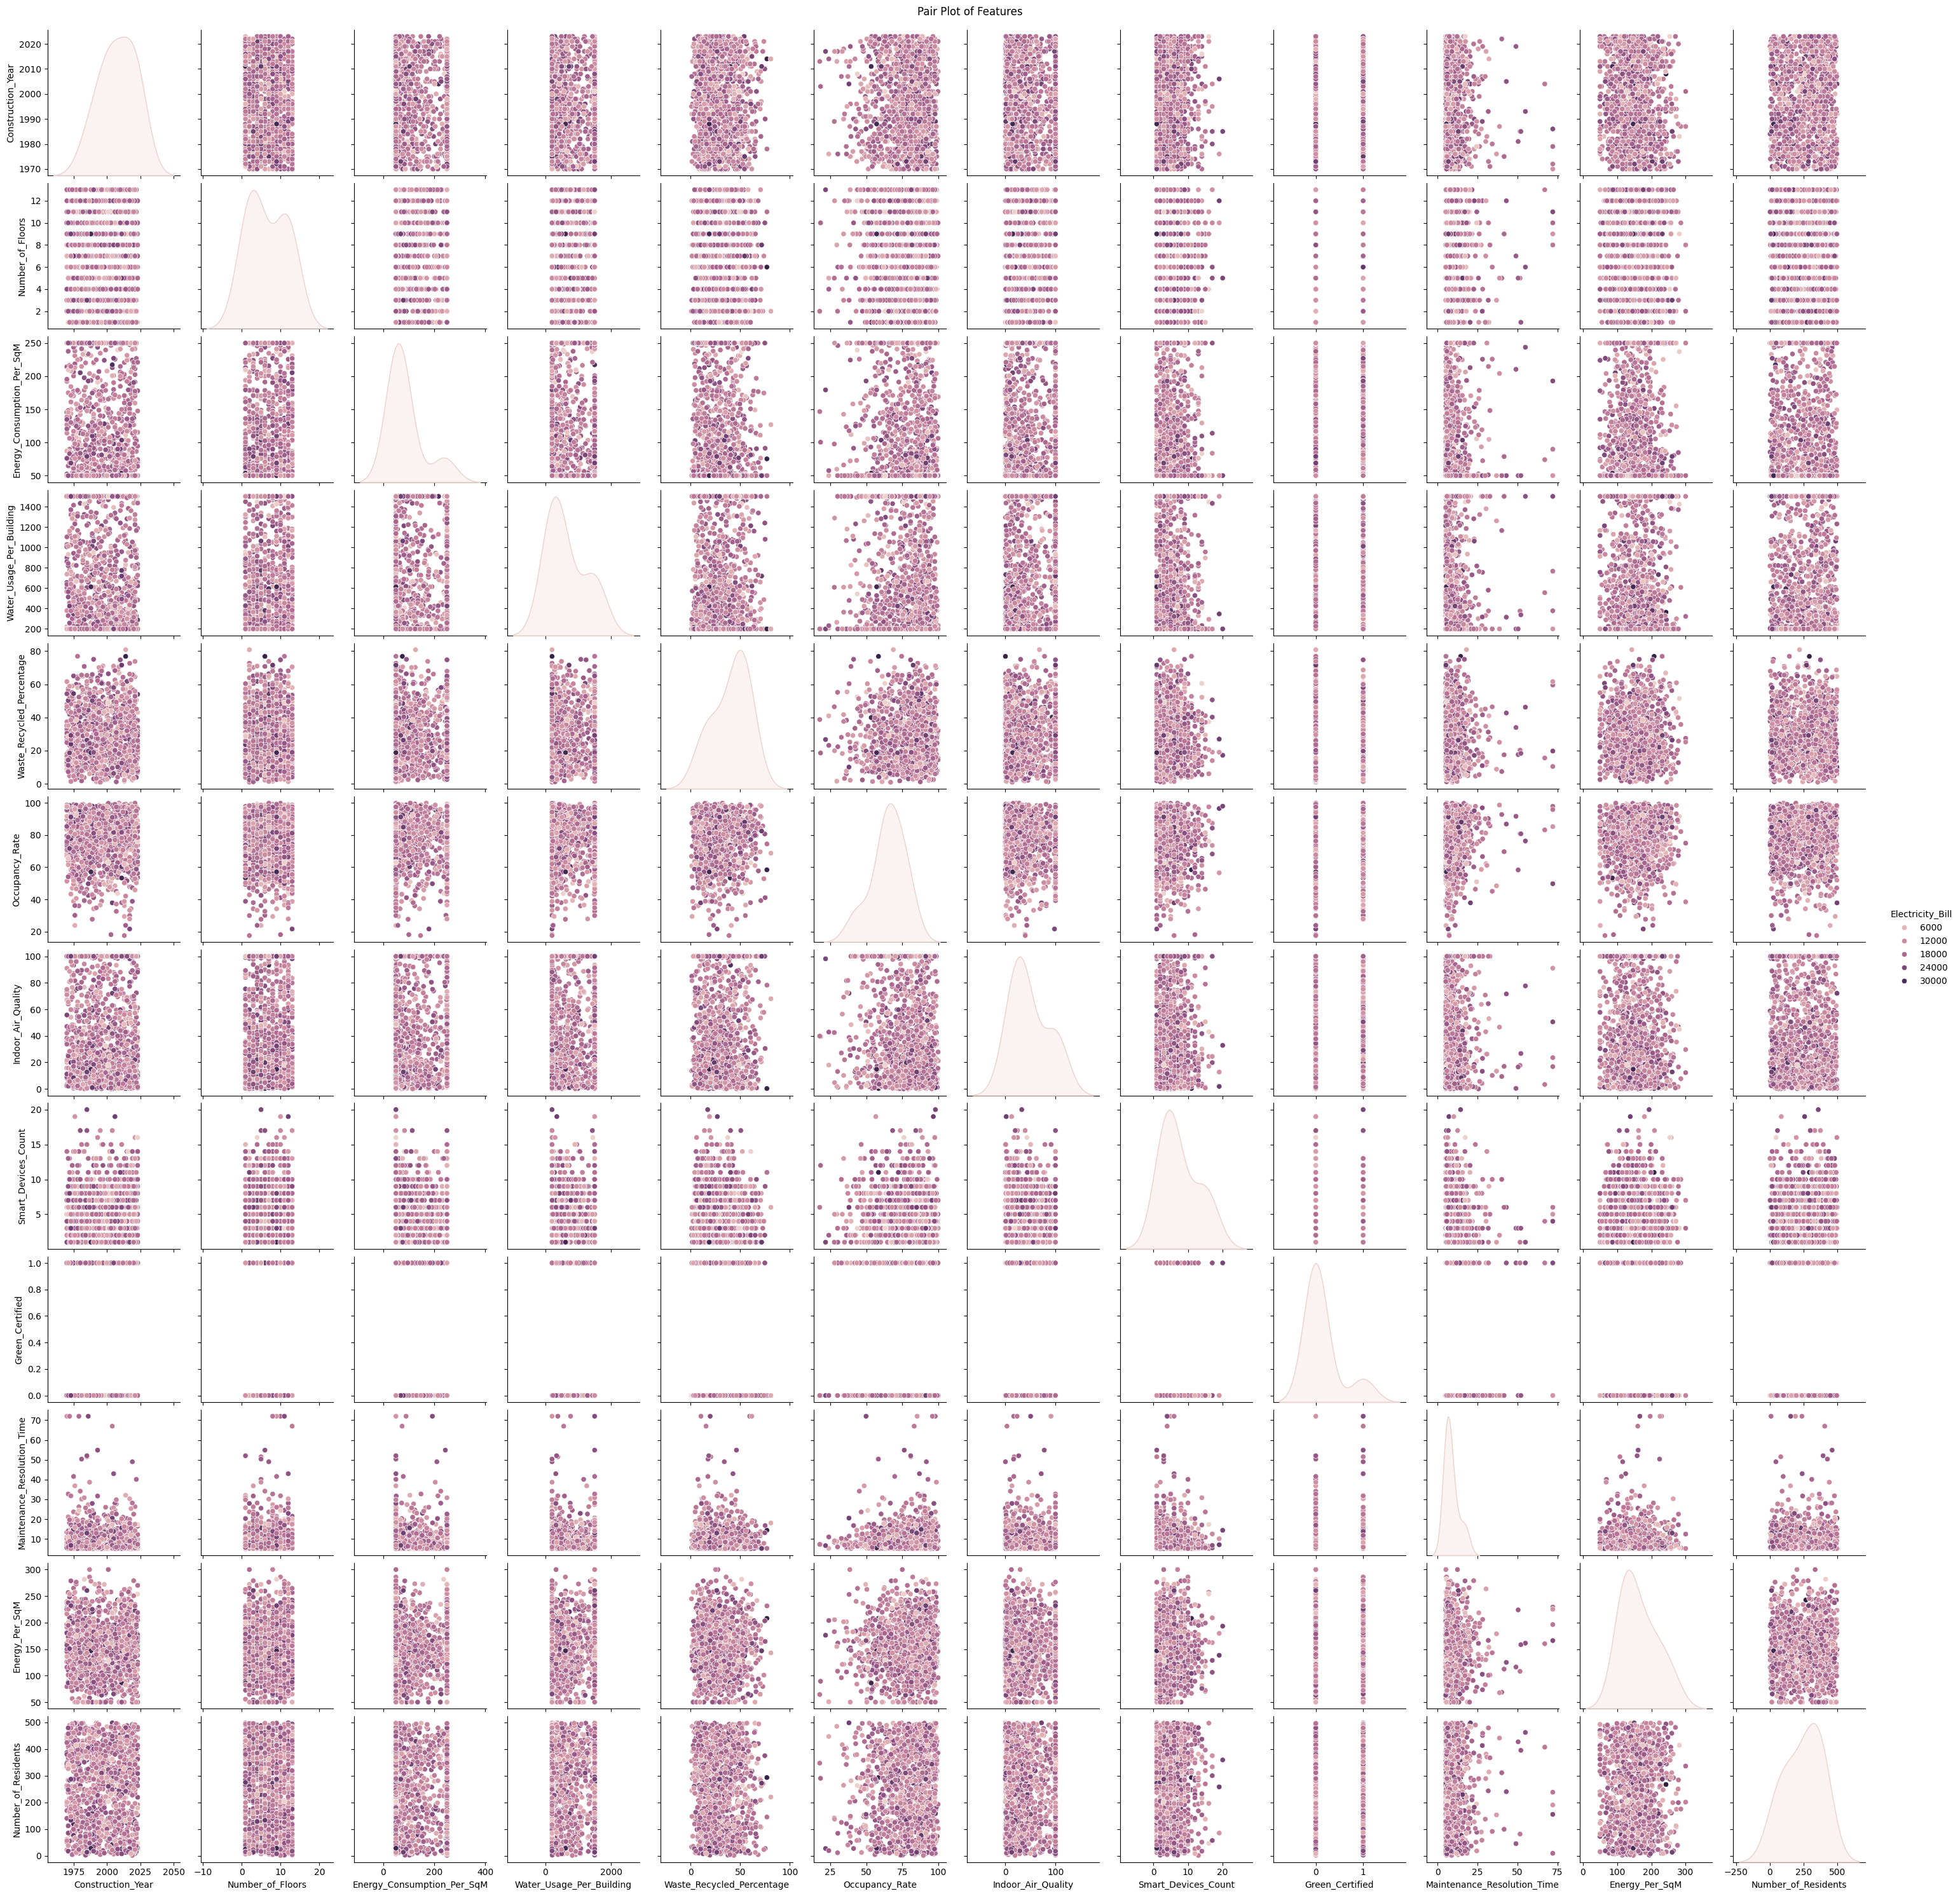

In [6]:
if demo == 1:
    sns.pairplot(df, hue=df.columns[-1])  
    plt.suptitle("Pair Plot of Features", y=1)
    plt.show()

## Box plot

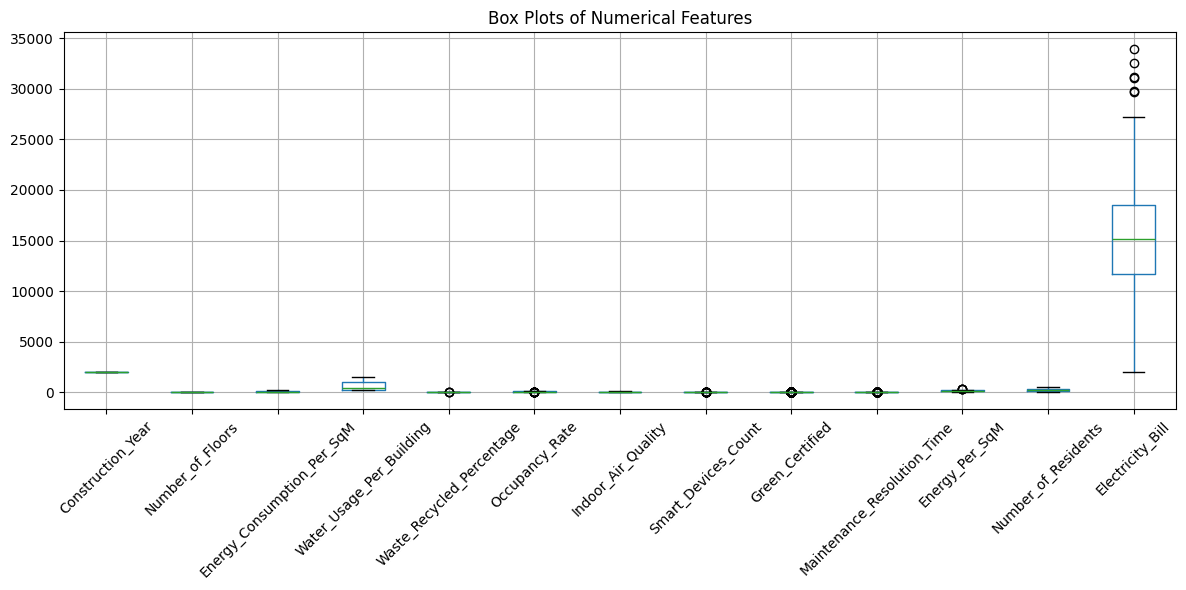

In [7]:
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title("Box Plots of Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Violin plot

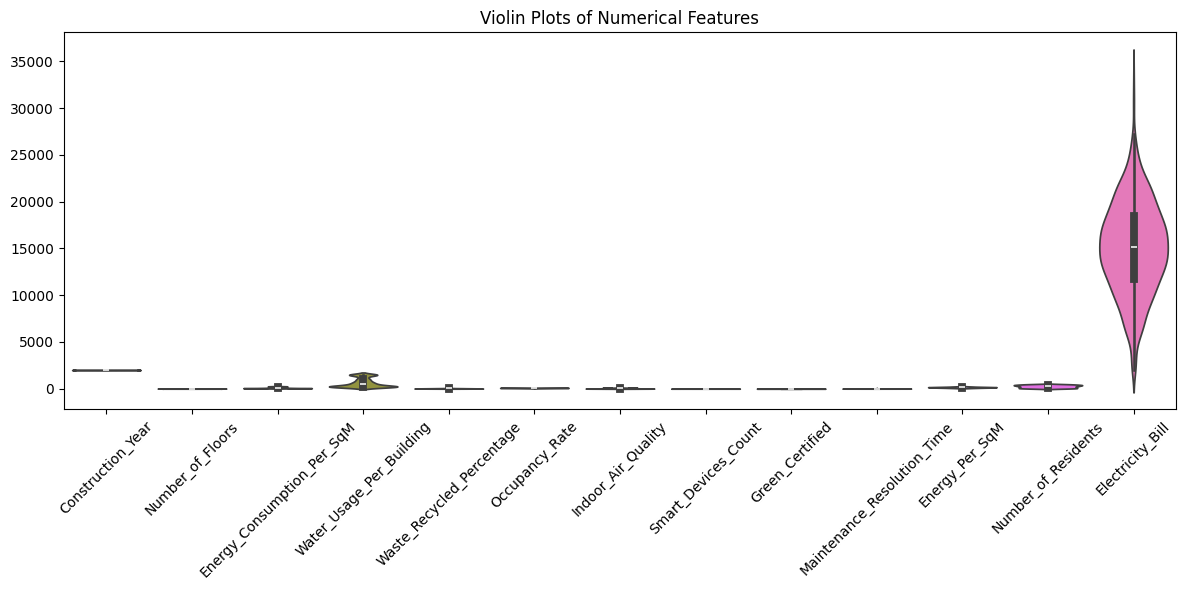

In [8]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df)
plt.title("Violin Plots of Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Count plot

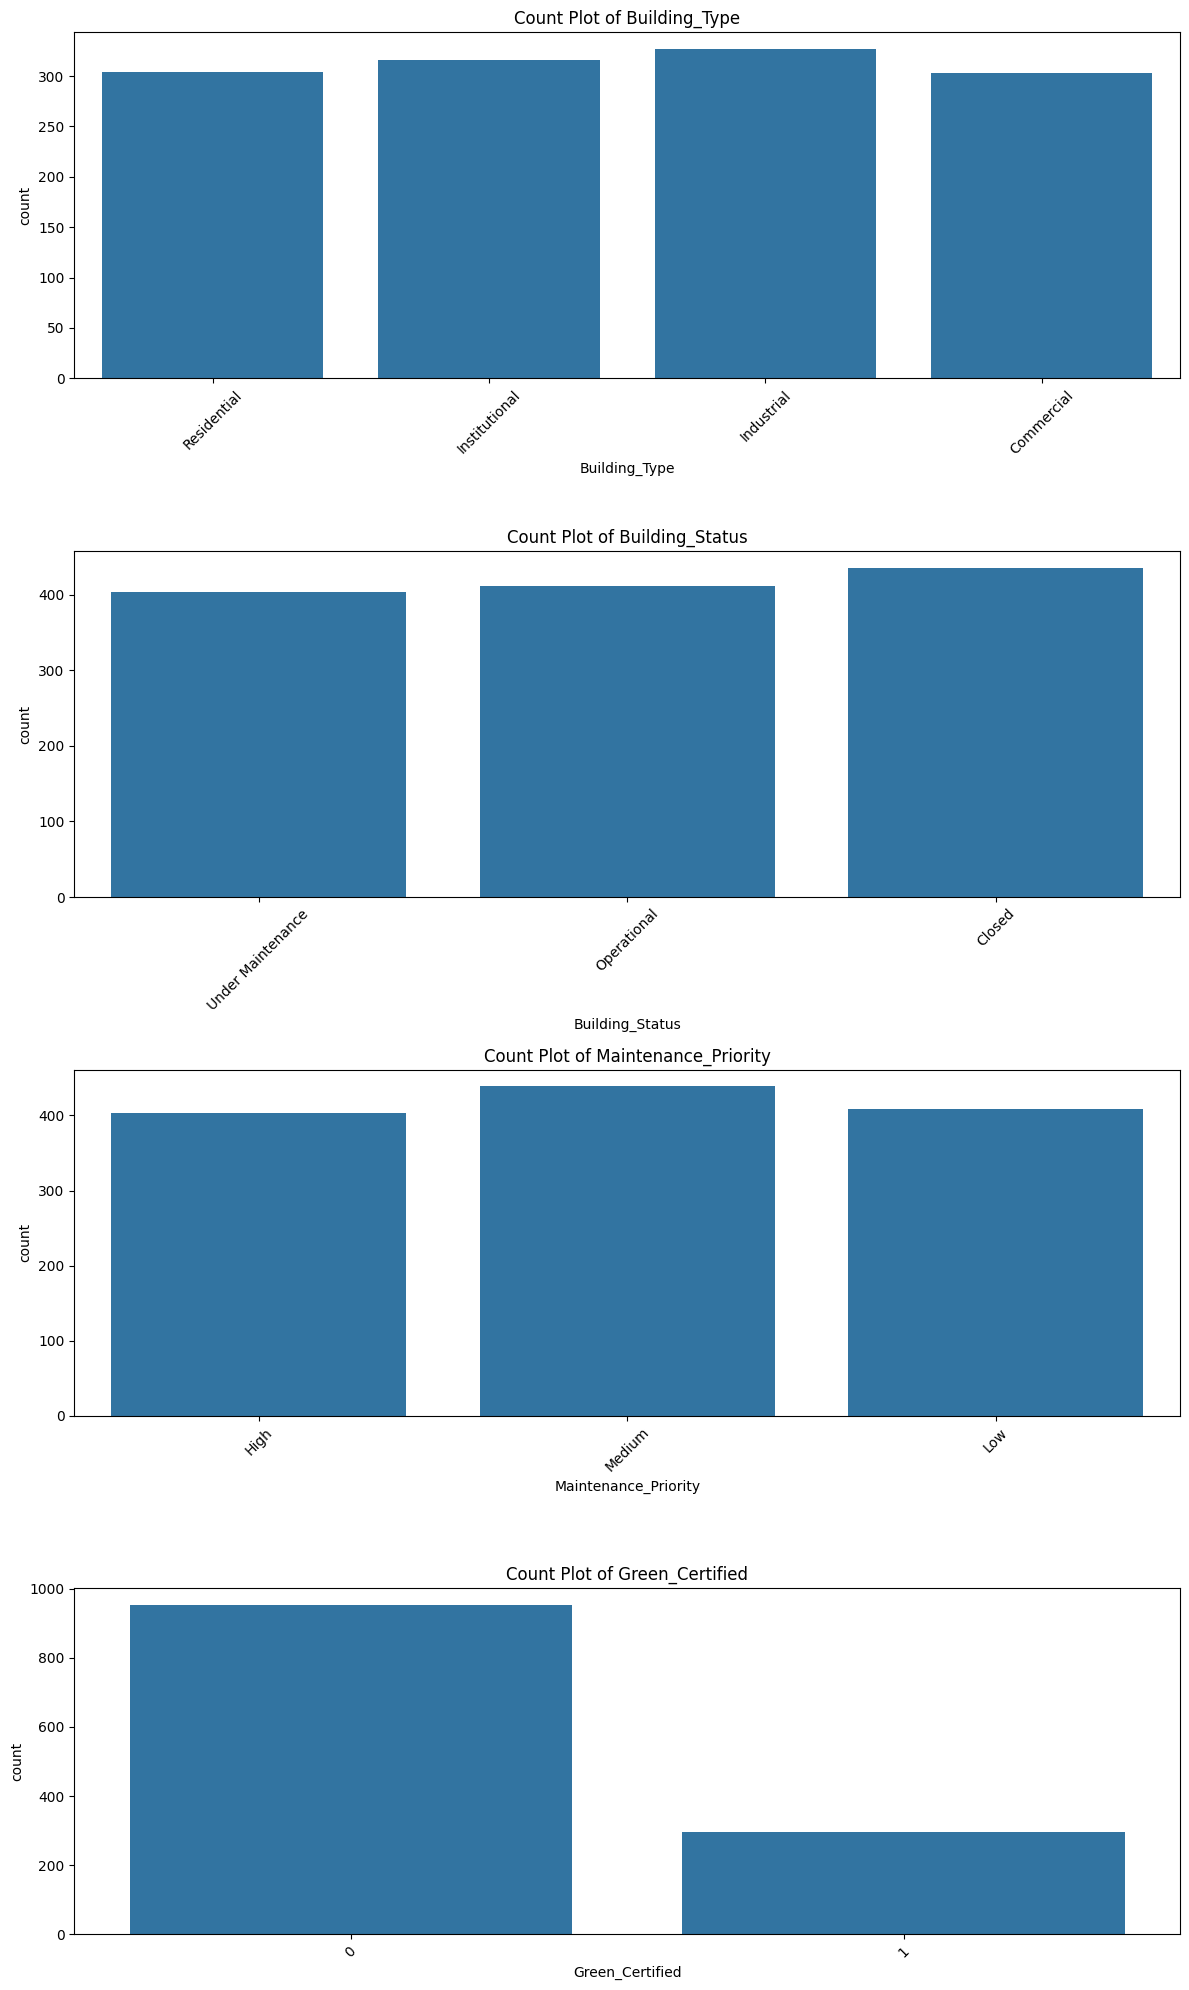

In [9]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

if 'Green_Certified' not in categorical_features:
    categorical_features.append('Green_Certified')

n_cat = len(categorical_features)

fig, axes = plt.subplots(n_cat, 1, figsize=(12, 5*n_cat))

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, ax=axes[i] if n_cat > 1 else axes)
    axes[i].set_title(f"Count Plot of {feature}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Correlation heatmap

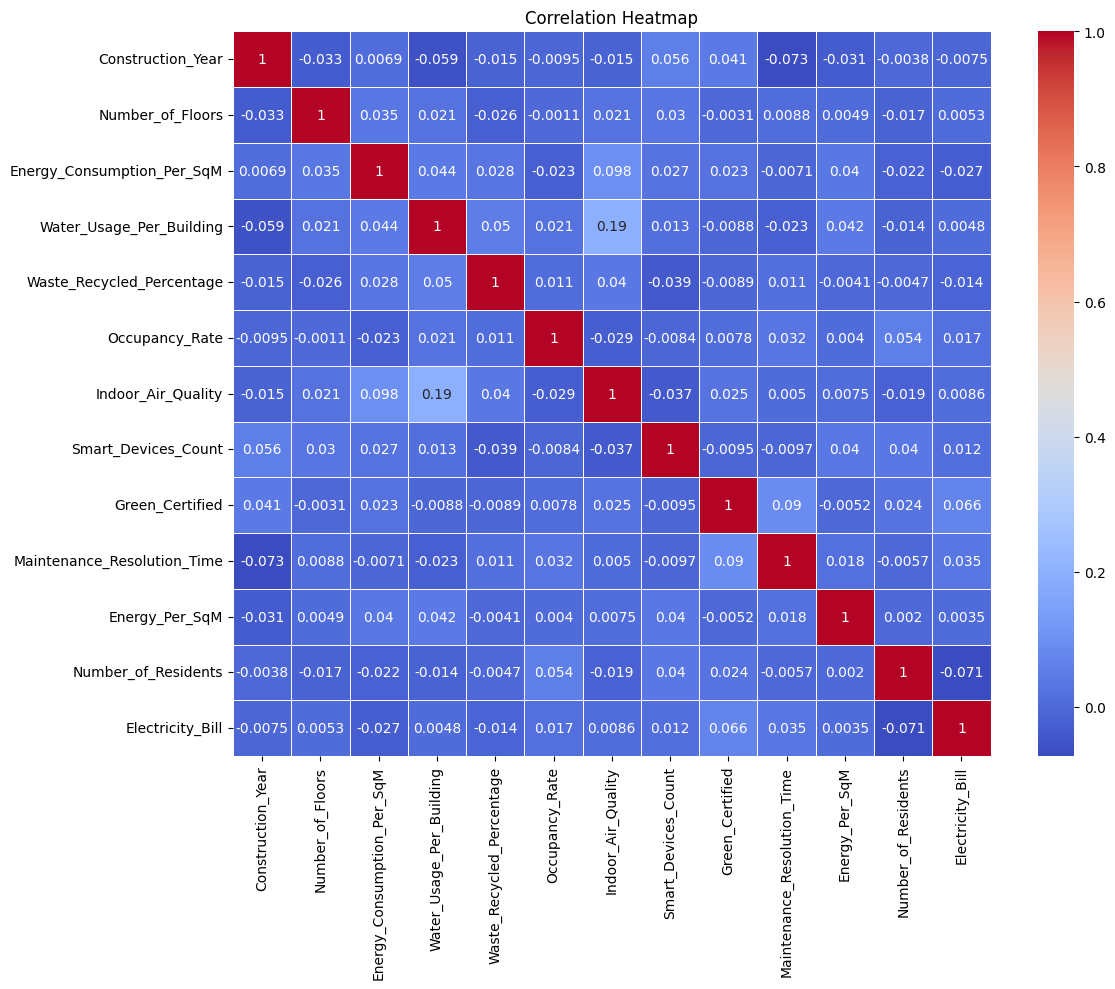

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [11]:
CATEGORICAL_COLS = ['Building_Type', 'Building_Status', 'Maintenance_Priority']
NOT_TO_SCALE = ['Building_Type', 'Building_Status', 'Maintenance_Priority', "Green_Priority", "Electricity_Bill"]

In [12]:
label_encoder = LabelEncoder()

for i in CATEGORICAL_COLS:
    df[i] = label_encoder.fit_transform(df[i])

In [13]:
X = df.drop('Electricity_Bill', axis=1)  # Features
y = df['Electricity_Bill']  # Target label

# Part b 
## UMAP

c:\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


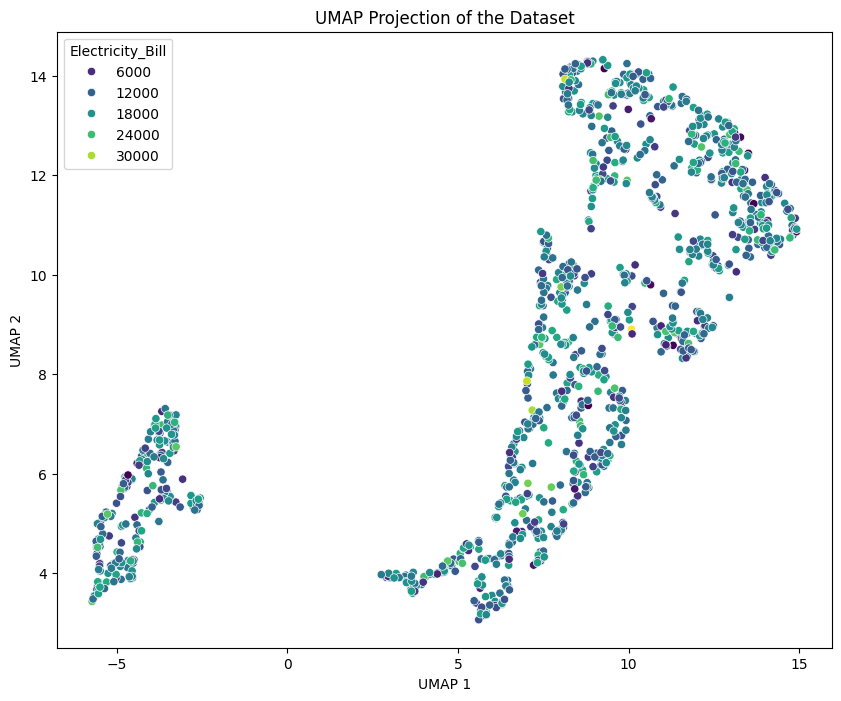

In [14]:
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='viridis')
plt.title("UMAP Projection of the Dataset")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

Normalizing the data

In [15]:
mm = MinMaxScaler()

cols = df.columns.difference(NOT_TO_SCALE)
df[cols] = mm.fit_transform(df[cols])

df

Building_Type  Construction_Year  Number_of_Floors  \
0                 3           0.358491          0.916667   
1                 2           0.188679          0.416667   
2                 1           0.679245          0.750000   
3                 0           0.283019          0.000000   
4                 1           0.679245          0.916667   
...             ...                ...               ...   
1245              3           0.283019          0.750000   
1246              0           0.698113          0.333333   
1247              0           0.377358          0.000000   
1248              2           0.962264          0.416667   
1249              3           0.886792          0.583333   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                       0.000000                  0.213601   
1                       0.878796                  0.000000   
2                       0.243780                  0.000000   
3                       0.092353                  0.000000   
4                       0.000000                  0.113149   
...                          ...                       ...   
1245                    0.488067                  0.367627   
1246                    0.000000                  0.508495   
1247                    0.000000                  1.000000   
1248                    1.000000                  1.000000   
1249                    0.469106                  1.000000   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                      0.594021        0.780018            0.137509   
1                      0.568868        0.334150            0.101467   
2                      0.204296        0.375660            0.277321   
3                      0.710330        0.713472            0.014858   
4                      0.325444        0.958549            0.018409   
...                         ...             ...                 ...   
1245                   0.358779        0.817566            0.513234   
1246                   0.283425        0.970638            1.000000   
1247                   0.566175        0.928704            0.135251   
1248                   0.686421        0.609544            0.135251   
1249                   0.161882        0.727608            0.135251   

      Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                0.263158              0.0                     0.033005   
1                0.473684              0.0                     0.434914   
2                0.052632              1.0                     0.018272   
3                0.052632              0.0                     0.004880   
4                0.947368              0.0                     0.030753   
...                   ...              ...                          ...   
1245             0.421053              0.0                     0.049314   
1246             0.210526              0.0                     0.012090   
1247             0.000000              0.0                     0.026292   
1248             0.263158              0.0                     0.136518   
1249             0.052632              1.0                     0.012604   

      Building_Status  Maintenance_Priority  Energy_Per_SqM  \
0                   2                     0        0.499343   
1                   2                     0        0.372347   
2                   1                     2        0.529538   
3                   0                     1        0.704606   
4                   0                     2        0.353169   
...               ...                   ...             ...   
1245                1                     1        0.155212   
1246                0                     1        0.406817   
1247                2                     2        0.246005   
1248                1                     2        0.446757   
1249                2                     1        0.088821   

      Number_of_Residents  El

In [16]:
X_original = df.drop('Electricity_Bill', axis=1)  # Features
y_original = df['Electricity_Bill']  # Target label

Splitting into train and test 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size = 0.2, random_state = 42)

In [18]:
X_train

Building_Type  Construction_Year  Number_of_Floors  \
1194              3           0.452830          0.916667   
911               2           0.264151          1.000000   
422               2           0.660377          0.250000   
670               3           0.075472          0.000000   
931               0           0.264151          0.833333   
...             ...                ...               ...   
1044              0           0.886792          1.000000   
1095              0           0.811321          0.416667   
1130              0           0.301887          0.833333   
860               1           0.849057          0.083333   
1126              0           0.773585          0.166667   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
1194                    0.000000                  0.292775   
911                     0.000000                  0.592331   
422                     0.000000                  1.000000   
670                     0.000000                  0.761133   
931                     1.000000                  0.030058   
...                          ...                       ...   
1044                    1.000000                  0.000000   
1095                    0.000000                  0.695651   
1130                    0.713942                  1.000000   
860                     0.870502                  0.000000   
1126                    0.000000                  0.127489   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
1194                   0.527471        0.761137            0.060701   
911                    0.179643        0.521143            0.019582   
422                    0.448951        0.881262            0.087589   
670                    0.133901        0.686595            0.482990   
931                    0.182934        0.508822            0.081581   
...                         ...             ...                 ...   
1044                   0.199818        0.953991            0.015982   
1095                   0.056182        0.540006            0.488344   
1130                   0.235340        0.390989            0.505171   
860                    0.554045        0.951936            0.690063   
1126                   0.553040        0.715220            0.752218   

      Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
1194             0.210526              0.0                     0.009899   
911              0.105263              0.0                     0.011183   
422              0.315789              1.0                     0.032088   
670              0.105263              1.0                     0.098298   
931              0.315789              1.0                     0.029140   
...                   ...              ...                          ...   
1044             0.210526              0.0                     0.052232   
1095             0.157895              0.0                     0.189633   
1130             0.157895              1.0                     1.000000   
860              0.157895              0.0                     0.045982   
1126             0.000000              1.0                     0.024654   

      Building_Status  Maintenance_Priority  Energy_Per_SqM  \
1194                1                     1        0.081401   
911                 1                     1        0.443830   
422                 2                     1        0.350207   
670                 2                     2        0.649217   
931                 2                     0        0.776231   
...               ...                   ...             ...   
1044                1                     2        0.365475   
1095                1                     1        0.383857   
1130                1                     0        0.464271   
860                 0                     0        0.440585   
1126                1                     2        0.460527   

      Number_of_Residents  
1

Fitting the model on the data

In [19]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# Part c

In [21]:
tr_mse, tr_rmse, tr_mae, tr_r2, tr_adjustedr2 = calculate_metrics(y_train,y_pred_train,X_train)
te_mse, te_rmse, te_mae, te_r2, te_adjustedr2 = calculate_metrics(y_test,y_pred_test,X_test)

print("----TRAIN METRICS----")
print(f"MSE: {tr_mse}\nRMSE: {tr_rmse}\nMAE: {tr_mae}\nR2: {tr_r2}\nAdjusted R2: {tr_adjustedr2}\n\n")

print("----TEST METRICS----")
print(f"MSE: {te_mse}\nRMSE: {te_rmse}\nMAE: {te_mae}\nR2: {te_r2}\nAdjusted R2: {te_adjustedr2}")


----TRAIN METRICS----
MSE: 24475013.16847547
RMSE: 4947.222773281538
MAE: 4006.32846932936
R2: 0.013922520844610209
Adjusted R2: -0.0011091480449536562


----TEST METRICS----
MSE: 24278016.155742623
RMSE: 4927.272689403604
MAE: 3842.4093125585155
R2: 3.7344733075372893e-05
Adjusted R2: -0.0640628254763429


In [22]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe.fit(X_original, y_original)

X_transformed = rfe.transform(X_original)

X_transformed_train, X_transformed_test, y_train, y_test = train_test_split(X_transformed, y_original, test_size=0.2, random_state=42)

In [23]:
RFE_regressor = LinearRegression()
RFE_regressor.fit(X_transformed_train, y_train)

LinearRegression()

# Part d

In [24]:
y_pred_train = RFE_regressor.predict(X_transformed_train)
y_pred_test = RFE_regressor.predict(X_transformed_test)

tr_mse, tr_rmse, tr_mae, tr_r2, tr_adjustedr2 = calculate_metrics(y_train,y_pred_train,X_transformed_train)
te_mse, te_rmse, te_mae, te_r2, te_adjustedr2 = calculate_metrics(y_test,y_pred_test,X_transformed_test)

print("----TRAIN METRICS----")
print(f"MSE: {tr_mse}\nRMSE: {tr_rmse}\nMAE: {tr_mae}\nR2: {tr_r2}\nAdjusted R2: {tr_adjustedr2}\n\n")

print("----TEST METRICS----")
print(f"MSE: {te_mse}\nRMSE: {te_rmse}\nMAE: {te_mae}\nR2: {te_r2}\nAdjusted R2: {te_adjustedr2}")

----TRAIN METRICS----
MSE: 24598921.045604337
RMSE: 4959.729936761108
MAE: 4017.1253534034668
R2: 0.008930377784842625
Adjusted R2: 0.005945228320339169


----TEST METRICS----
MSE: 23976300.350124482
RMSE: 4896.560052743607
MAE: 3816.722345837314
R2: 0.012464411927795571
Adjusted R2: 0.00042129500008580845


In [25]:
df_encoded = pd.get_dummies(original_df, columns=CATEGORICAL_COLS, prefix=CATEGORICAL_COLS)

In [26]:
X_onehot = df_encoded.drop("Electricity_Bill", axis=1)
y_onehot = df_encoded["Electricity_Bill"] # P.S I have written y_onehot but I am not using onehot encoding on it

In [27]:
X_onehot_train, X_onehot_test, y_onehot_train, y_onehot_test = train_test_split(X_onehot, y_onehot, test_size=0.2, random_state=42)
ridge = Ridge()
ridge.fit(X_onehot, y_onehot) 

Ridge()

# Part e

In [28]:
y_onehot_pred_train = ridge.predict(X_onehot_train)
y_onehot_pred_test = ridge.predict(X_onehot_test)

tr_mse, tr_rmse, tr_mae, tr_r2, tr_adjustedr2 = calculate_metrics(y_onehot_train,y_onehot_pred_train,X_onehot_train)
te_mse, te_rmse, te_mae, te_r2, te_adjustedr2 = calculate_metrics(y_onehot_test,y_onehot_pred_test,X_onehot_test)

print("----TRAIN METRICS----")
print(f"MSE: {tr_mse}\nRMSE: {tr_rmse}\nMAE: {tr_mae}\nR2: {tr_r2}\nAdjusted R2: {tr_adjustedr2}\n\n")

print("----TEST METRICS----")
print(f"MSE: {te_mse}\nRMSE: {te_rmse}\nMAE: {te_mae}\nR2: {te_r2}\nAdjusted R2: {te_adjustedr2}")

----TRAIN METRICS----
MSE: 24279780.494423226
RMSE: 4927.451724210317
MAE: 3981.71251379437
R2: 0.021788279353217255
Adjusted R2: -0.00023900606564586369


----TEST METRICS----
MSE: 23294434.679618455
RMSE: 4826.430842726171
MAE: 3733.689649935618
R2: 0.04054908746473351
Adjusted R2: -0.05243734458714244


# Part f

In [29]:
components_list = [4, 5, 6, 8]

for n_components in components_list:
    print(f"Results for {n_components} components:")
    
    ica = FastICA(n_components=n_components, random_state=42)
    X_train_ica = ica.fit_transform(X_onehot_train)
    X_test_ica = ica.transform(X_onehot_test)

    regressor = LinearRegression()
    
    regressor.fit(X_train_ica, y_onehot_train)
    
    y_train_pred = regressor.predict(X_train_ica)
    y_test_pred = regressor.predict(X_test_ica)
    
    tr_mse, tr_rmse, tr_mae, tr_r2, tr_adjustedr2 = calculate_metrics(y_onehot_train, y_train_pred, X_train_ica)
    te_mse, te_rmse, te_mae, te_r2, te_adjustedr2 = calculate_metrics(y_onehot_test, y_test_pred, X_test_ica)
    
    print("----TRAIN METRICS----")
    print(f"MSE: {tr_mse}\nRMSE: {tr_rmse}\nMAE: {tr_mae}\nR2: {tr_r2}\nAdjusted R2: {tr_adjustedr2}\n\n")
    print("----TEST METRICS----")
    print(f"MSE: {te_mse}\nRMSE: {te_rmse}\nMAE: {te_mae}\nR2: {te_r2}\nAdjusted R2: {te_adjustedr2}\n\n")

Results for 4 components:
----TRAIN METRICS----
MSE: 24723471.40007696
RMSE: 4972.270246082463
MAE: 3999.4550092249247
R2: 0.003912349858938846
Adjusted R2: -9.202260393981199e-05


----TEST METRICS----
MSE: 24640324.962147772
RMSE: 4963.90219103356
MAE: 3854.391804757433
R2: -0.014885426293822945
Adjusted R2: -0.03145498427413029


Results for 5 components:
----TRAIN METRICS----
MSE: 24680344.74145633
RMSE: 4967.931636149629
MAE: 3993.7287932774107
R2: 0.005649886281260286
Adjusted R2: 0.000648125145854106


----TEST METRICS----
MSE: 24698709.660744872
RMSE: 4969.77963905291
MAE: 3839.8179581959985
R2: -0.01729017460033999
Adjusted R2: -0.03813628473559283


Results for 6 components:
----TRAIN METRICS----
MSE: 24616414.970208745
RMSE: 4961.493219808805
MAE: 3986.3483138005904
R2: 0.008225562430680955
Adjusted R2: 0.0022329676417425226


----TEST METRICS----
MSE: 24493802.30529969
RMSE: 4949.121367000378
MAE: 3823.8870147468483
R2: -0.008850452758148775
Adjusted R2: -0.0337603404805721

# Part g

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size = 0.2, random_state = 42)

alpha_values = [0.005, 0.01 , 0.05, 0.1, 0.5, 1.0]

for alpha in alpha_values:
    print(f"Results for alpha = {alpha}:")
    
    elasticnet = ElasticNet(alpha=alpha, random_state=42)
    elasticnet.fit(X_train, y_train)
    
    y_train_pred = elasticnet.predict(X_train)
    y_test_pred = elasticnet.predict(X_test)
    
    tr_mse, tr_rmse, tr_mae, tr_r2, tr_adjustedr2 = calculate_metrics(y_train, y_train_pred, X_train)
    te_mse, te_rmse, te_mae, te_r2, te_adjustedr2 = calculate_metrics(y_test, y_test_pred, X_test)
    
    print("----TRAIN METRICS----")
    print(f"MSE: {tr_mse}\nRMSE: {tr_rmse}\nMAE: {tr_mae}\nR2: {tr_r2}\nAdjusted R2: {tr_adjustedr2}\n\n")

    print("----TEST METRICS----")
    print(f"MSE: {te_mse}\nRMSE: {te_rmse}\nMAE: {te_mae}\nR2: {te_r2}\nAdjusted R2: {te_adjustedr2}\n\n")

Results for alpha = 0.005:
----TRAIN METRICS----
MSE: 24476127.3244174
RMSE: 4947.335376181546
MAE: 4005.7638522018233
R2: 0.013877632448635158
Adjusted R2: -0.0011547207152575734


----TEST METRICS----
MSE: 24259681.026543718
RMSE: 4925.41176213154
MAE: 3840.5976189762887
R2: 0.0007925318274732973
Adjusted R2: -0.06325922895281688


Results for alpha = 0.01:
----TRAIN METRICS----
MSE: 24478391.9642343
RMSE: 4947.5642455893685
MAE: 4005.2273828058283
R2: 0.013786392035137873
Adjusted R2: -0.0012473519887168383


----TEST METRICS----
MSE: 24246459.55231687
RMSE: 4924.069409778549
MAE: 3839.237800635025
R2: 0.0013370977586271149
Adjusted R2: -0.06267975494915312


Results for alpha = 0.05:
----TRAIN METRICS----
MSE: 24500165.43664655
RMSE: 4949.764179902569
MAE: 4001.923319767777
R2: 0.012909157337001487
Adjusted R2: -0.0021379591670076525


----TEST METRICS----
MSE: 24205628.35381715
RMSE: 4919.921580047506
MAE: 3834.8048975247293
R2: 0.0030188527013534916
Adjusted R2: -0.06089019520240

# Part h

In [31]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

tr_mse, tr_rmse, tr_mae, tr_r2, tr_adjustedr2 = calculate_metrics(y_train, y_train_pred, X_train)
te_mse, te_rmse, te_mae, te_r2, te_adjustedr2 = calculate_metrics(y_test, y_test_pred, X_test)

print("----TRAIN METRICS----")
print(f"MSE: {tr_mse}\nRMSE: {tr_rmse}\nMAE: {tr_mae}\nR2: {tr_r2}\nAdjusted R2: {tr_adjustedr2}\n\n")

print("----TEST METRICS----")
print(f"MSE: {te_mse}\nRMSE: {te_rmse}\nMAE: {te_mae}\nR2: {te_r2}\nAdjusted R2: {te_adjustedr2}")

----TRAIN METRICS----
MSE: 14926446.25730777
RMSE: 3863.4759294329465
MAE: 3092.7481886865007
R2: 0.398626166333897
Adjusted R2: 0.38945888228410885


----TEST METRICS----
MSE: 24571551.630275473
RMSE: 4956.970004980409
MAE: 3843.5355926796324
R2: -0.012052791077278968
Adjusted R2: -0.07692796999248919
